<a href="https://colab.research.google.com/github/dsmaroof/ds1002-ds3zj/blob/main/DS1002_11_21_lab1_ftx_stock_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1: Python

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. Bankman-Fried was recently found guilty on seven counts of fraud and conspiracy.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code. Point assignments are indicated for each section. There are 15 total points possible for this lab, which counts as 5% of your overall grade. There is a 1-point extra credit option at the end.

Useful reference material:
- [Pandas Review](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/pandas-review.ipynb) notebook.
- [Charts Reference](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/charts-in-colaboratory.ipynb) notebook.
- [Plots Walkthrough](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/plotting-examples.ipynb)

## Group Submissions

If you are working in a group to complete this lab, you may have no more than 3 members to a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [1]:
# List group members (if applicable). Identify names and computing IDs
#
# Name                    Computing ID

## 1. Load Libraries & Data (3 pts)

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

## 2. Get Summary Data (1 pt)

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("ftx-2021-01-01--2023-12-31.csv")


df.head()

,timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp
0,"2022-12-31T00:00:00.000Z;""2022-12-31T23:59:59...."
1,"2022-12-30T00:00:00.000Z;""2022-12-30T23:59:59...."
2,"2022-12-29T00:00:00.000Z;""2022-12-29T23:59:59...."
3,"2022-12-28T00:00:00.000Z;""2022-12-28T23:59:59...."
4,"2022-12-27T00:00:00.000Z;""2022-12-27T23:59:59...."


*In* code, display how many rows and columns are in the raw dataset.

In [3]:
df.shape

# There are 741 observations and 1 column in the raw dataset

(741, 1)

## 3. Clean and Organize the Data (3 pts)

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`,



In [4]:
# 1) Locate and remove duplicate observations

# Locate duplicates
print(df.duplicated().sum())      # There are 14 duplicate observations

# Remove duplicates
df = df.drop_duplicates()



# 2) Remove missing observations

df.dropna()   # There are no missing observations



# 3) Order the data (separate the columns and row values by ';' name)

column_names = ['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'open', 'high', 'low', 'close', 'volume', 'marketCap', 'timestamp']
df = df.copy()
df[column_names] = df['timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp'].str.split(';', expand=True)

# Drop the respective columns
df.drop(columns=list(df.columns[0:5]) + [df.columns[10]], inplace=True)

df


14


,open,high,low,close,volume,timestamp
0,0.8389684425,0.853501666,0.8352262088,0.8426884241,3001502.06,"""2022-12-31T23:59:59.999Z"""
1,0.860193073,0.864751879,0.8266428992,0.8390481756,3608615.07,"""2022-12-30T23:59:59.999Z"""
2,0.8857226476,0.8871175386,0.8430286751,0.8602311608,3766979.57,"""2022-12-29T23:59:59.999Z"""
3,0.9211619958,0.9257015248,0.8698420242,0.8860908765,4192949.85,"""2022-12-28T23:59:59.999Z"""
4,0.9311378574,0.9554017418,0.9164143458,0.9236676658,4574953.05,"""2022-12-27T23:59:59.999Z"""
...,...,...,...,...,...,...
735,9.386493,10.00487172,9.21524402,9.56213089,46303336.73,"""2021-01-07T23:59:59.999Z"""
736,8.67128533,9.39079731,8.4259458,9.39079731,31404627.93,"""2021-01-06T23:59:59.999Z"""
737,7.52821638,8.71494656,7.08112034,8.66468773,49479278.39,"""2021-01-05T23:59:59.999Z"""
738,6.94867983,7.63214646,6.35821845,7.51407925,40526109.15,"""2021-01-04T23:59:59.999Z"""


Now display the first 10 rows of the cleaned dataset.

In [5]:
df.head(10)

,open,high,low,close,volume,timestamp
0,0.8389684425,0.853501666,0.8352262088,0.8426884241,3001502.06,"""2022-12-31T23:59:59.999Z"""
1,0.860193073,0.864751879,0.8266428992,0.8390481756,3608615.07,"""2022-12-30T23:59:59.999Z"""
2,0.8857226476,0.8871175386,0.8430286751,0.8602311608,3766979.57,"""2022-12-29T23:59:59.999Z"""
3,0.9211619958,0.9257015248,0.8698420242,0.8860908765,4192949.85,"""2022-12-28T23:59:59.999Z"""
4,0.9311378574,0.9554017418,0.9164143458,0.9236676658,4574953.05,"""2022-12-27T23:59:59.999Z"""
5,0.8945671492,1.0111825828,0.8936523976,0.9306958402,7065306.21,"""2022-12-26T23:59:59.999Z"""
6,0.9244321852,0.9355165843,0.8943699316,0.894656646,2577834.83,"""2022-12-25T23:59:59.999Z"""
7,0.9575050529,0.9756714327,0.9210848028,0.9244326068,5055004.16,"""2022-12-24T23:59:59.999Z"""
8,1.0271327165,1.0382822479,0.948058351,0.9570063953,17088962.94,"""2022-12-23T23:59:59.999Z"""
9,0.8739733875,1.1271983252,0.8356250943,1.0271616025,22418556.51,"""2022-12-22T23:59:59.999Z"""


## 4. Calculate Daily Gains/Losses (2 pts)

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Reference code for this is available in the [Pandas Review](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/pandas-review.ipynb) notebook. Hint: It is not complicated and does not require a for-loop.

In [6]:
# convert string to numeric
df["close"] = pd.to_numeric(df["close"])

# add a new column
df["close_change"] = df["close"].diff()
# this function removes the first row NaN since it has nothing to compare to
df = df.dropna()
df


,open,high,low,close,volume,timestamp,close_change
1,0.860193073,0.864751879,0.8266428992,0.839048,3608615.07,"""2022-12-30T23:59:59.999Z""",-0.003640
2,0.8857226476,0.8871175386,0.8430286751,0.860231,3766979.57,"""2022-12-29T23:59:59.999Z""",0.021183
3,0.9211619958,0.9257015248,0.8698420242,0.886091,4192949.85,"""2022-12-28T23:59:59.999Z""",0.025860
4,0.9311378574,0.9554017418,0.9164143458,0.923668,4574953.05,"""2022-12-27T23:59:59.999Z""",0.037577
5,0.8945671492,1.0111825828,0.8936523976,0.930696,7065306.21,"""2022-12-26T23:59:59.999Z""",0.007028
...,...,...,...,...,...,...,...
735,9.386493,10.00487172,9.21524402,9.562131,46303336.73,"""2021-01-07T23:59:59.999Z""",0.181143
736,8.67128533,9.39079731,8.4259458,9.390797,31404627.93,"""2021-01-06T23:59:59.999Z""",-0.171334
737,7.52821638,8.71494656,7.08112034,8.664688,49479278.39,"""2021-01-05T23:59:59.999Z""",-0.726110
738,6.94867983,7.63214646,6.35821845,7.514079,40526109.15,"""2021-01-04T23:59:59.999Z""",-1.150608


## 5. Identify Growth Days (1 pt)

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [7]:
# Sort the dataframe ranked by daily change in closing prices (close_change)
df = df.sort_values(["close_change"], ascending=False)
df

# ID the top 10 days of positive growth showing ROC & dates
df_growthdays = df.head(10)[["close_change", "timestamp"]]
df_growthdays

,close_change,timestamp
56,16.623292,"""2022-11-07T23:59:59.999Z"""
468,14.497738,"""2021-09-16T23:59:59.999Z"""
598,14.017812,"""2021-05-18T23:59:59.999Z"""
478,9.506381,"""2021-09-15T23:59:59.999Z"""
473,8.315742,"""2021-09-19T23:59:59.999Z"""
484,6.929033,"""2021-09-09T23:59:59.999Z"""
350,6.770635,"""2022-01-20T23:59:59.999Z"""
594,6.228516,"""2021-05-22T23:59:59.999Z"""
481,5.201864,"""2021-09-12T23:59:59.999Z"""
605,5.154806,"""2021-05-11T23:59:59.999Z"""


## 6. Calculate the % Rate of Change (2 pts)

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [8]:
df["rate_of_change"] = df["close_change"].pct_change()
# this function removes the first row NaN since it has nothing to compare to
df = df.dropna()
df

,open,high,low,close,volume,timestamp,close_change,rate_of_change
468,71.1618960295,71.5196856198,66.0359733723,67.482300,488691046.23,"""2021-09-16T23:59:59.999Z""",14.497738,-0.127866
598,50.42471946,54.02851129,50.01571967,50.955200,155234606.81,"""2021-05-18T23:59:59.999Z""",14.017812,-0.033103
478,67.6764501594,72.9607472597,66.7156327851,71.181617,573941919.51,"""2021-09-15T23:59:59.999Z""",9.506381,-0.321836
473,63.6466364079,63.9646769533,59.9810684044,60.813879,426172880.86,"""2021-09-19T23:59:59.999Z""",8.315742,-0.125246
484,77.69491104,85.0168524,71.89197958,79.871313,3338581624.99,"""2021-09-09T23:59:59.999Z""",6.929033,-0.166757
...,...,...,...,...,...,...,...,...
593,33.31927696,34.07468762,22.84066611,27.070227,297093226.22,"""2021-05-23T23:59:59.999Z""",-6.333923,0.145437
693,23.23836117,26.6527579,23.23836117,26.241206,91981050,"""2021-02-18T23:59:59.999Z""",-8.335900,0.316072
488,60.88517978,64.95760208,59.5087918,63.547556,718891313.19,"""2021-09-05T23:59:59.999Z""",-9.800320,0.175676
469,55.781205374,60.9011983754,54.5896591743,57.618209,891909778.27,"""2021-09-23T23:59:59.999Z""",-9.864091,0.006507


## 7. Identify Greatest % Change Days (1 pt)

Based on the rate change column calculated above, identify the top 5 days of greatest rate changes, whether positive or negative.

Display your results in a table showing both the rate of change and their dates.

In [9]:
# Identify the top 5 days of greatest rate changes, whether positive or negative.

# First, you can make the rate changes positive to ignore positive/negative in ranking.
# However, since all of the rates are negative in this dataframe, you don't need to do it in this case.

# Sort dataframe by rate_of_change column
df = df.sort_values(["rate_of_change"], ascending=True)   #ascending=True bc the most negative rate of change is greatest
df


# display results in table showing ROC & dates
df_pctdays = df.head(5)[["rate_of_change", "timestamp"]]
df_pctdays


,rate_of_change,timestamp
445,-5.043601,"""2021-10-16T23:59:59.999Z"""
134,-0.788684,"""2022-08-21T23:59:59.999Z"""
86,-0.339142,"""2022-10-08T23:59:59.999Z"""
478,-0.321836,"""2021-09-15T23:59:59.999Z"""
5,-0.258454,"""2022-12-26T23:59:59.999Z"""


## 8. Plot the Data (2 pts)

Finally, create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

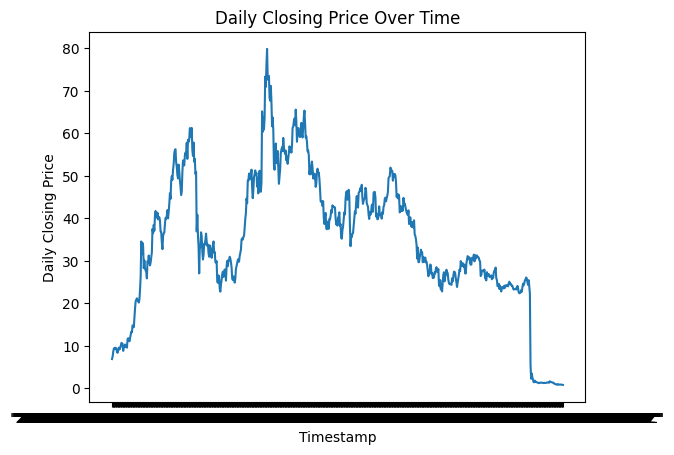

In [10]:
#1. Plot of daily closing price

# First, sort the timestamp data from earliest to most recent
df = df.sort_values(["timestamp"], ascending=True)
df.head()

# Make the line plot
import matplotlib.pyplot as plt
plt.plot(df["timestamp"], df["close"], label="Daily Closing Price")
plt.xlabel("Timestamp")
plt.ylabel("Daily Closing Price")
plt.title("Daily Closing Price Over Time")
plt.show()



In [11]:
df.head(10)

,open,high,low,close,volume,timestamp,close_change,rate_of_change
739,6.20113267,7.00752345,6.171834,6.923968,31046652.87,"""2021-01-03T23:59:59.999Z""",-0.590111,0.003524
738,6.94867983,7.63214646,6.35821845,7.514079,40526109.15,"""2021-01-04T23:59:59.999Z""",-1.150608,0.013995
737,7.52821638,8.71494656,7.08112034,8.664688,49479278.39,"""2021-01-05T23:59:59.999Z""",-0.726110,0.010031
736,8.67128533,9.39079731,8.4259458,9.390797,31404627.93,"""2021-01-06T23:59:59.999Z""",-0.171334,0.016575
735,9.386493,10.00487172,9.21524402,9.562131,46303336.73,"""2021-01-07T23:59:59.999Z""",0.181143,-0.015443
734,9.56923877,9.72642922,8.45226488,9.380988,42286267.89,"""2021-01-08T23:59:59.999Z""",-0.189522,0.032412
733,9.37044999,9.63612025,8.72804429,9.570511,28498948.68,"""2021-01-09T23:59:59.999Z""",0.261701,-0.001569
732,9.57191738,9.94479719,8.6571467,9.308809,31012393.14,"""2021-01-10T23:59:59.999Z""",0.697813,-0.040627
731,9.2983155,9.2983155,7.12604974,8.610997,101302369.57,"""2021-01-11T23:59:59.999Z""",0.229863,-0.005084
730,8.6151428,9.09747943,8.04091578,8.381133,26745357.03,"""2021-01-12T23:59:59.999Z""",-0.803182,0.017148


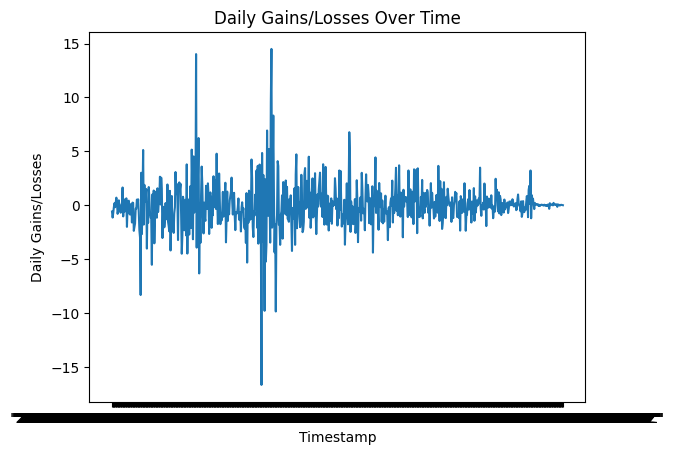

In [12]:
#2. Plot of daily gains/losses

#Make the line plot
import matplotlib.pyplot as plt
plt.plot(df["timestamp"], df["close_change"], label="Daily Gains/Losses")
plt.xlabel("Timestamp")
plt.ylabel("Daily Gains/Losses")
plt.title("Daily Gains/Losses Over Time")
plt.show()

## BONUS! (1 pt)

Combine the two plots from #8 above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

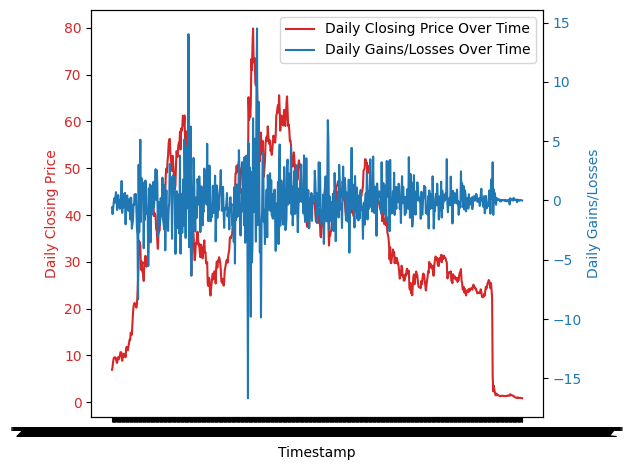

In [13]:
# Plot 1
fig, ax1 = plt.subplots()

color = "tab:red"
ax1.set_xlabel("Timestamp")
ax1.set_ylabel("Daily Closing Price", color=color)
plot1, = ax1.plot(df["timestamp"], df["close"], label="Daily Closing Price Over Time", color=color)
ax1.tick_params(axis="y", labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


# Plot 2
color = 'tab:blue'
ax2.set_ylabel('Daily Gains/Losses', color=color)
plot2, = ax2.plot(df["timestamp"], df["close_change"], label="Daily Gains/Losses Over Time", color=color)
ax2.tick_params(axis='y', labelcolor=color)


# make legend
plots = [plot1, plot2]
labels = [plot.get_label() for plot in plots]


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend(plots, labels)
plt.show()
